In [1]:
import numpy as np
import sys

sys.path.append('../src')

import cpu
import program
import importlib
cpu = importlib.reload(cpu)
program = importlib.reload(program)

p = program.Program.from_file('../src/initial_program.txt')
p_snake = program.Program.from_file('../src/snake_game.txt')
p_first = program.Program.from_file('../src/first_program.txt')
p_2 = program.Program.from_file('../src/program2.txt')
p_branch = program.Program.from_file('../src/branch_program.txt')
p = program.Program.from_array(np.array(['a9', 'c0', 'aa', 'e8', '69', 'c4', '00']))

In [2]:
# Initialise CPU
daveNES = cpu.MOS6502(debug = False)
daveNES.initialise_RAM()


In [78]:
daveNES.load_program(p_first)
daveNES.reset()

In [79]:
daveNES.run_program()
daveNES.ram.visualise_memory()
#print(daveNES.ram.memory[0x0200: 0x0205])
daveNES.reset()

LDA
PC: 0x8000, SP: 0xfd, A: 0x0, X: 0x0, Y: 0x0
STA
PC: 0x8002, SP: 0xfd, A: 0x1, X: 0x0, Y: 0x0
LDA
PC: 0x8005, SP: 0xfd, A: 0x1, X: 0x0, Y: 0x0
STA
PC: 0x8007, SP: 0xfd, A: 0x5, X: 0x0, Y: 0x0
LDA
PC: 0x800a, SP: 0xfd, A: 0x5, X: 0x0, Y: 0x0
STA
PC: 0x800c, SP: 0xfd, A: 0x8, X: 0x0, Y: 0x0
BRK
PC: 0x800f, SP: 0xfd, A: 0x8, X: 0x0, Y: 0x0


In [80]:
display = np.zeros((32, 32))
xx, yy = np.meshgrid(range(32), range(32))
for i in range(0x0200, 0x05ff+1):
    ind = i-0x0200
    x, y = xx.ravel()[ind], yy.ravel()[ind]
    display[y, x] = daveNES.ram.memory[i]

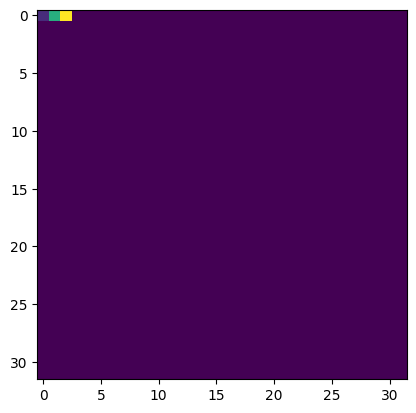

In [81]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(display)
plt.show()